# **Required Libraries**

In [ ]:
import numpy as np 
import pandas as pd

# Data Preprocessing 
from sklearn.model_selection import KFold, train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

%matplotlib inline

# Machine Learning Models
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Scores and Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


# **Functions**

In [ ]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

In [ ]:
def find_outliers_IQR(df): #outlier değerleri bulmak için

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
def drop_outliers(df,col_name):
    for x in [col_name]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
        return df

# **Data Exploration**

In [ ]:
!gdown 1p34aGbHZ4A94qXZwCGwlCOd4mwjE40t6

Downloading...
From: https://drive.google.com/uc?id=1p34aGbHZ4A94qXZwCGwlCOd4mwjE40t6
To: /content/heart_failure_clinical_records_dataset.csv
100% 12.2k/12.2k [00:00<00:00, 14.1MB/s]


In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
features = df.iloc[:,0:12] # Features
target = df.iloc[:,12:13] # DEATH_EVENT

In [ ]:
features

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
target

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [ ]:
print(features.describe()) 

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

# **Data Visualisation**

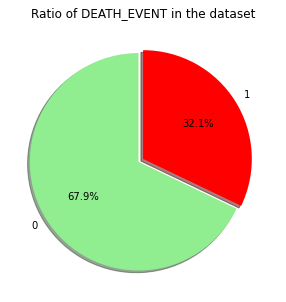

In [ ]:
# Is our data imbalanced?
labels =df['DEATH_EVENT'].value_counts(sort = True).index
sizes = df['DEATH_EVENT'].value_counts(sort = True)

colors = ["lightgreen","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=[True], startangle=90,)

plt.title('Ratio of DEATH_EVENT in the dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


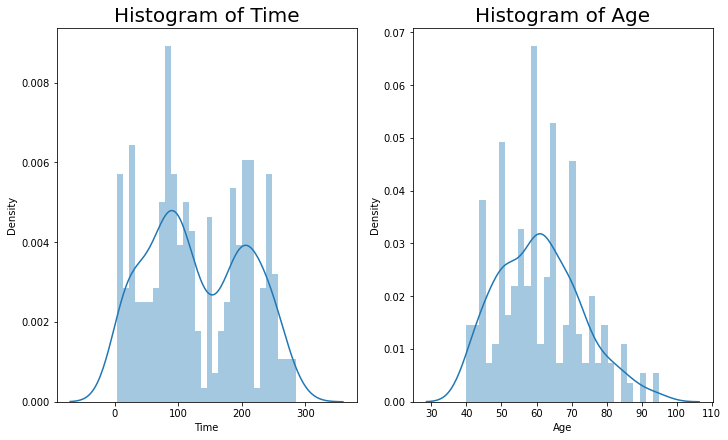

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,6),constrained_layout=True)

plot_hist(df.time,title='Time', xlabel="Time", ax=axes[0])
plot_hist(df.age, bins=30, title='Age', xlabel='Age', ax=axes[1])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


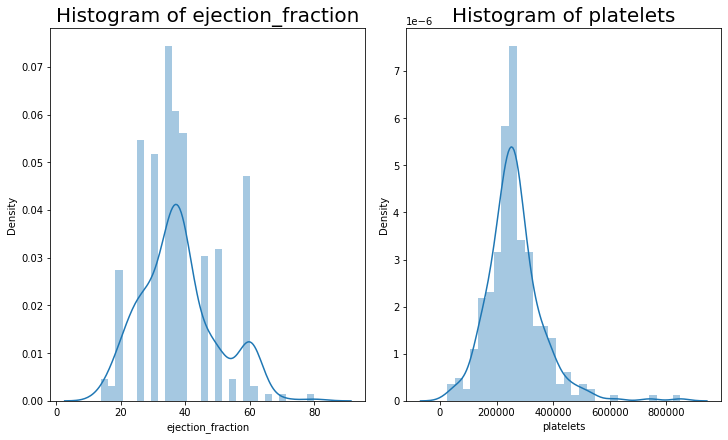

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,6),constrained_layout=True)

plot_hist(df.ejection_fraction  ,title='ejection_fraction', xlabel="ejection_fraction", ax=axes[0])
plot_hist(df.platelets, bins=30, title='platelets', xlabel='platelets', ax=axes[1])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


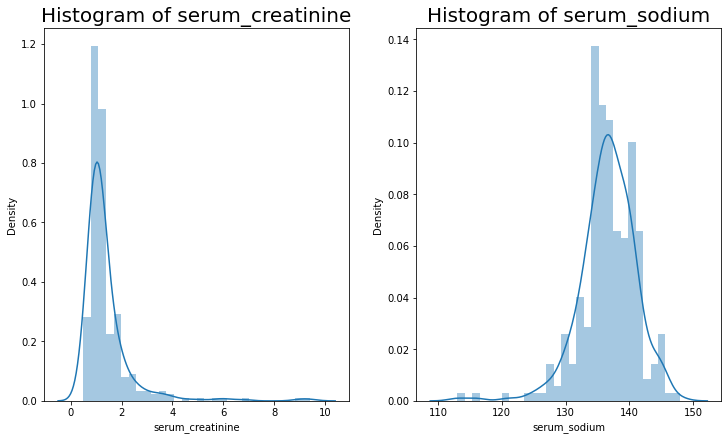

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,6),constrained_layout=True)

plot_hist(df.serum_creatinine,title='serum_creatinine', xlabel="serum_creatinine", ax=axes[0])
plot_hist(df.serum_sodium, bins=30, title='serum_sodium', xlabel='serum_sodium', ax=axes[1])

plt.show()

In [ ]:
# Boxplots of each feature to check outliers
fig = px.box(features, y="age")
fig.show()
fig = px.box(features, y="creatinine_phosphokinase")
fig.show()
fig = px.box(features, y="ejection_fraction")
fig.show()
fig = px.box(features, y="platelets")
fig.show()
fig = px.box(features, y="serum_sodium")
fig.show()
fig = px.box(features, y="serum_creatinine")
fig.show()
fig = px.box(features, y="time")
fig.show()

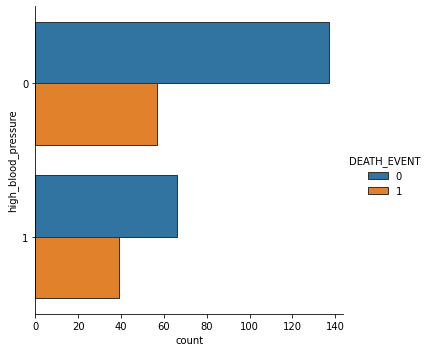

In [ ]:
sns.catplot(y="high_blood_pressure", hue="DEATH_EVENT", kind="count",
            palette="tab10", edgecolor=".2",
            data=df)

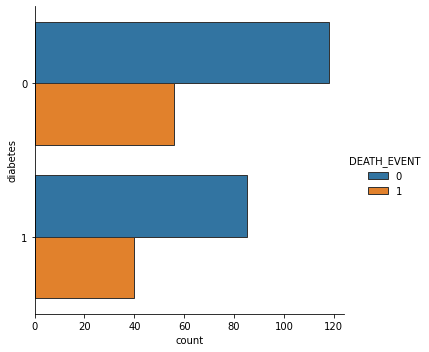

In [ ]:
sns.catplot(y="diabetes", hue="DEATH_EVENT", kind="count",
            palette="tab10", edgecolor=".2",
            data=df)

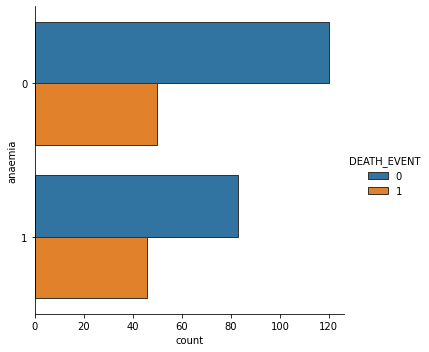

In [ ]:
sns.catplot(y="anaemia", hue="DEATH_EVENT", kind="count",
            palette="tab10", edgecolor=".2",
            data=df)

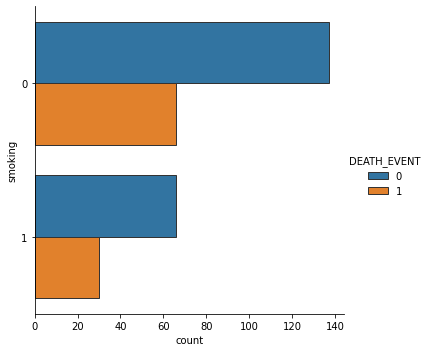

In [ ]:
sns.catplot(y="smoking", hue="DEATH_EVENT", kind="count",
            palette="tab10", edgecolor=".2",
            data=df)

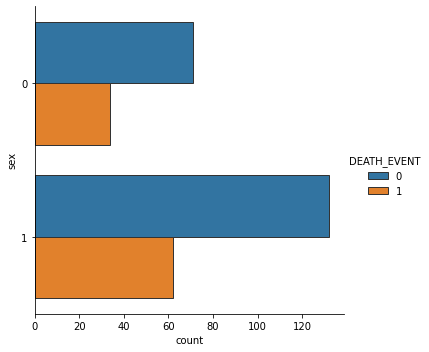

In [ ]:
sns.catplot(y="sex", hue="DEATH_EVENT", kind="count",
            palette="tab10", edgecolor=".2",
            data=df)

In [ ]:
# 1 for men 0 for women
len_data = len(df)
len_w = len(df[df["sex"]==0])
len_m = len_data - len_w

men_death= len(df.loc[(df["DEATH_EVENT"]==1)&(df['sex']==1)])
men_no_death = len_m - men_death

women_death = len(df.loc[(df["DEATH_EVENT"]==1) & (df['sex']==0)])
women_no_death = len_w - women_death

labels = ['Men with Heart Failure','Men healthy','Women with Heart Failure','Women healthy']
values = [men_death, men_no_death, women_death, women_no_death]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text=" Death Event according to the gender distribution")
fig.show()

# **Preprocessing**

In [ ]:
print("Age outliers")
outliers = find_outliers_IQR(df["age"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)

Age outliers
number of outliers: 0
max outlier value: nan
min outlier value: nan
Series([], Name: age, dtype: float64)


In [ ]:
print("Creatinine_phosphokinase outliers")
outliers = find_outliers_IQR(df["creatinine_phosphokinase"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)

Creatinine_phosphokinase outliers
number of outliers: 29
max outlier value: 7861
min outlier value: 1380
1      7861
38     2656
46     1380
52     3964
60     7702
72     5882
103    5209
107    1876
130    1808
134    4540
139    1548
147    1610
149    2261
153    1846
163    2334
164    2442
171    3966
176    1419
187    1896
200    1767
208    2281
227    2794
246    2017
250    2522
280    2695
283    1688
295    1820
296    2060
297    2413
Name: creatinine_phosphokinase, dtype: int64


In [ ]:
print("ejection_fraction outliers")
outliers = find_outliers_IQR(df["ejection_fraction"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)

ejection_fraction outliers
number of outliers: 2
max outlier value: 80
min outlier value: 70
64     80
217    70
Name: ejection_fraction, dtype: int64


In [ ]:
print("platelets outliers")
outliers = find_outliers_IQR(df["platelets"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)

platelets outliers
number of outliers: 21
max outlier value: 850000.0
min outlier value: 25100.0
7      454000.0
15      47000.0
47     451000.0
55     461000.0
69     497000.0
105    621000.0
109    850000.0
117    507000.0
162    448000.0
163     75000.0
167     70000.0
200     73000.0
212    481000.0
224    504000.0
230     62000.0
240    533000.0
277     25100.0
279    451000.0
281     51000.0
287    543000.0
296    742000.0
Name: platelets, dtype: float64


In [ ]:
print("serum_sodium outliers")
outliers = find_outliers_IQR(df["serum_sodium"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)

serum_sodium outliers
number of outliers: 4
max outlier value: 124
min outlier value: 113
4      116
19     121
126    124
199    113
Name: serum_sodium, dtype: int64


In [ ]:
print("serum_creatinine outliers")
outliers = find_outliers_IQR(df["serum_creatinine"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)

serum_creatinine outliers
number of outliers: 29
max outlier value: 9.4
min outlier value: 2.2
4      2.7
9      9.4
10     4.0
28     5.8
31     3.0
35     3.5
38     2.3
39     3.0
48     4.4
52     6.8
54     2.2
56     2.7
61     2.3
65     2.9
82     2.5
104    2.3
117    3.2
124    3.7
129    3.4
131    6.1
150    2.5
167    2.4
183    2.5
203    3.5
217    9.0
228    5.0
247    2.4
281    2.7
282    3.8
Name: serum_creatinine, dtype: float64


In [ ]:
print("time outliers")
outliers = find_outliers_IQR(df["time"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)

time outliers
number of outliers: 0
max outlier value: nan
min outlier value: nan
Series([], Name: time, dtype: int64)


# **Drop Outliers**

In [ ]:
features = drop_outliers(features,'creatinine_phosphokinase')
features = drop_outliers(features,'ejection_fraction')
features = drop_outliers(features,'platelets')
features = drop_outliers(features,'serum_sodium')
features = drop_outliers(features,'serum_creatinine')
print(features)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                     582.0         0               20.0   
1    55.0        0                       NaN         0               38.0   
2    65.0        0                     146.0         0               20.0   
3    50.0        1                     111.0         0               20.0   
4    65.0        1                     160.0         1               20.0   
..    ...      ...                       ...       ...                ...   
294  62.0        0                      61.0         1               38.0   
295  55.0        0                       NaN         0               38.0   
296  45.0        0                       NaN         1               60.0   
297  45.0        0                       NaN         0               38.0   
298  50.0        0                     196.0         0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:

for i in features.columns: #outlier değerleri sildikten sonra yerini mean değerlerle doldurma işlemi
    features[i].fillna(features[i].mean(), inplace=True)
print(features)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                 582.00000         0               20.0   
1    55.0        0                 332.27037         0               38.0   
2    65.0        0                 146.00000         0               20.0   
3    50.0        1                 111.00000         0               20.0   
4    65.0        1                 160.00000         1               20.0   
..    ...      ...                       ...       ...                ...   
294  62.0        0                  61.00000         1               38.0   
295  55.0        0                 332.27037         0               38.0   
296  45.0        0                 332.27037         1               60.0   
297  45.0        0                 332.27037         0               38.0   
298  50.0        0                 196.00000         0               45.0   

     high_blood_pressure     platelets  serum_creatinine  serum_sodium  sex

In [ ]:

fig = px.box(features, y="creatinine_phosphokinase")
fig.show()
fig = px.box(features, y="ejection_fraction")
fig.show()
fig = px.box(features, y="platelets")
fig.show()
fig = px.box(features, y="serum_sodium")
fig.show()
fig = px.box(features, y="serum_creatinine")
fig.show()

# **Features Selection**

In [ ]:
#Select only the best 3 features
selector = SelectKBest(f_classif, k=3)
selector.fit(features, target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SelectKBest(k=3)

In [ ]:
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

In [ ]:
features.iloc[:,cols]


,ejection_fraction,serum_creatinine,time
0,20.0,1.900000,4
1,38.0,1.100000,6
2,20.0,1.300000,7
3,20.0,1.900000,7
4,20.0,1.136185,8
...,...,...,...
294,38.0,1.100000,270
295,38.0,1.200000,271
296,60.0,0.800000,278
297,38.0,1.400000,280


In [ ]:
selected_features = ['time','ejection_fraction','serum_creatinine']
x = features[selected_features]
y = df["DEATH_EVENT"]


# **Data Split**

In [ ]:
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=0.2,  random_state = 2)


In [ ]:
data_splits = {"x_train"  : x_train, "x_test"  : x_test, "y_train" : y_train, "y_test"  : y_test}
for i in data_splits: # How many samples in train and test sets:
    print(f"{i}: {data_splits.get(i).shape[0]} lines")

# **Get Results**

In [ ]:
def get_results(model,x_test, y_test):
  preds = model.predict(x_test)
  accuracy = accuracy_score(y_test, preds)
  recall= recall_score(y_test, preds, average="binary")
  precision= precision_score(y_test, preds, average="binary")
  f1= f1_score(y_test, preds, average="binary")
  print("Accuracy :", "{:.2f}%".format(100* accuracy))
  print("Recall :", "{:.2f}%".format(100*recall))
  print("Precision: ", "{:.2f}%".format(100*precision))
  print("F1 score :", "{:.2f}%".format(100* f1))

  # Confusion Matrix
  cm = confusion_matrix(y_test, preds)
  plt.figure()
  plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
  plt.title(" Confusion Matrix")
  plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
  plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
  plt.show() 
  return accuracy, recall, precision, f1


# **Predections**

In [ ]:
all_accuracy = []
all_recall = []
all_precision = []
all_f1 =[]

In [ ]:
models = ['Logistic Regression', 'SVMC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster']

**Logistic Regression**

In [ ]:
LogisticRegressionModel = LogisticRegression()

Accuracy : 81.25%
Recall : 75.00%
Precision:  60.00%
F1 score : 66.67%


<Figure size 432x288 with 0 Axes>

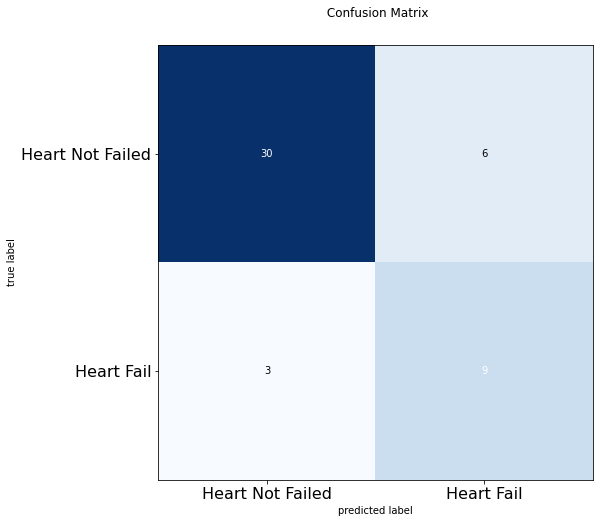

loop:  0
Accuracy : 91.67%
Recall : 71.43%
Precision:  100.00%
F1 score : 83.33%


<Figure size 432x288 with 0 Axes>

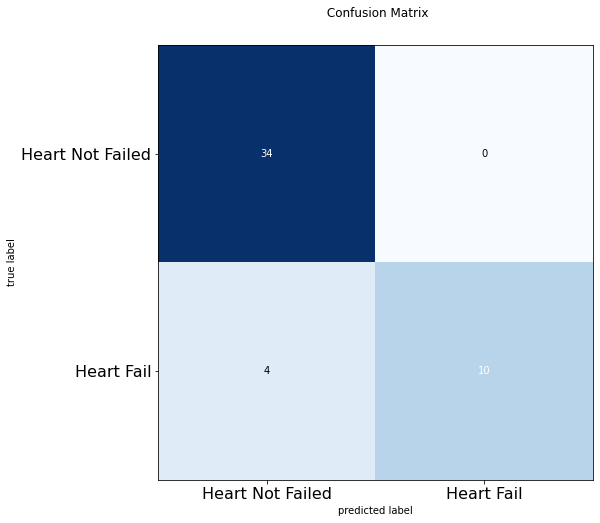

loop:  1
Accuracy : 79.17%
Recall : 59.09%
Precision:  92.86%
F1 score : 72.22%


<Figure size 432x288 with 0 Axes>

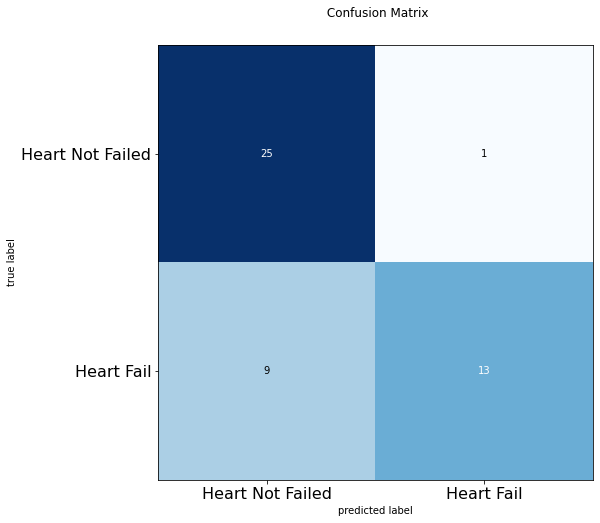

loop:  2
Accuracy : 79.17%
Recall : 69.23%
Precision:  60.00%
F1 score : 64.29%


<Figure size 432x288 with 0 Axes>

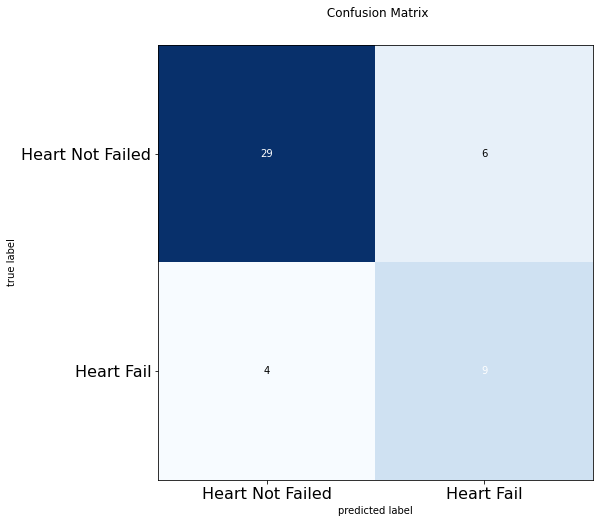

loop:  3
Accuracy : 72.34%
Recall : 50.00%
Precision:  69.23%
F1 score : 58.06%


<Figure size 432x288 with 0 Axes>

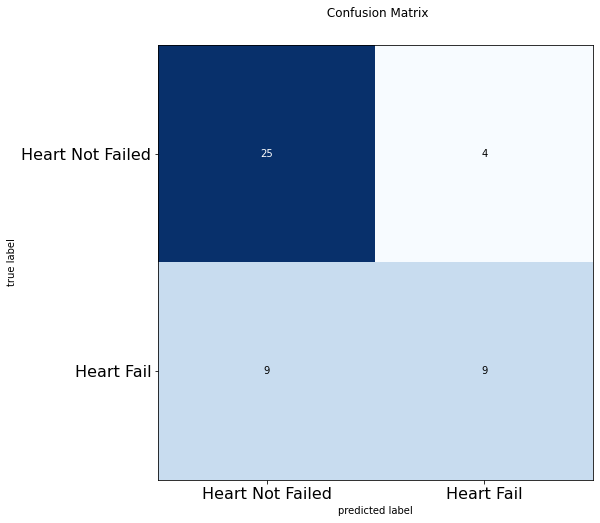

loop:  4


In [ ]:
cv = KFold(n_splits=5, shuffle=False)
c = 0
for train_index, valid_index in cv.split(x_train_valid):# verilerin 10 katlı çapraz geçerlemeye göre bölünüp sınanması
        x_train, x_valid, y_train, y_valid = x_train_valid.iloc[train_index], x_train_valid.iloc[valid_index], y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]
        LogisticRegressionModel.fit(x_train,y_train)
        get_results(LogisticRegressionModel,x_valid, y_valid)
        print("loop: ",c)
        c = c + 1
        

Accuracy : 90.00%
Recall : 76.47%
Precision:  86.67%
F1 score : 81.25%


<Figure size 432x288 with 0 Axes>

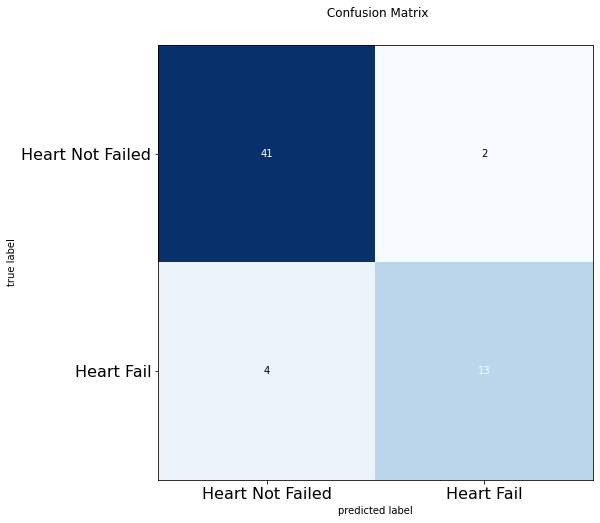

In [ ]:
# Using all test data
accuracy, recall, precision, f1  = get_results(LogisticRegressionModel,x_test, y_test)

In [ ]:
all_accuracy.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_f1.append(f1)

**Support Vector**

In [ ]:
SVCModel = SVC()

Accuracy : 89.58%
Recall : 83.33%
Precision:  76.92%
F1 score : 80.00%


<Figure size 432x288 with 0 Axes>

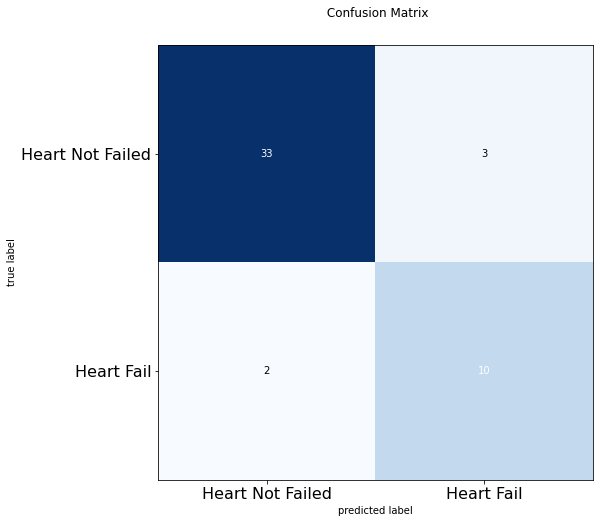

loop:  0
Accuracy : 89.58%
Recall : 71.43%
Precision:  90.91%
F1 score : 80.00%


<Figure size 432x288 with 0 Axes>

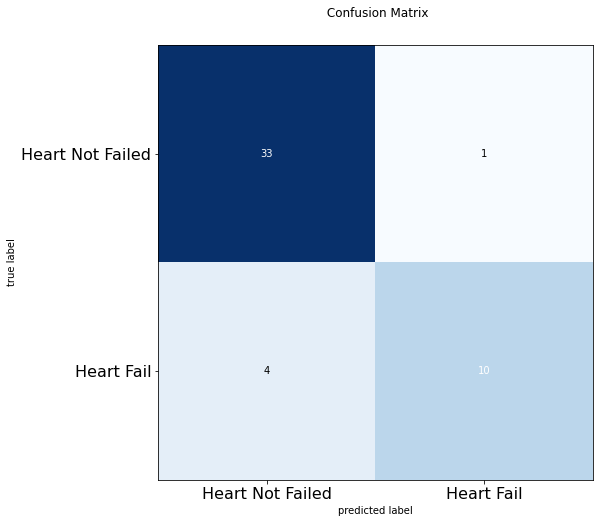

loop:  1
Accuracy : 72.92%
Recall : 40.91%
Precision:  100.00%
F1 score : 58.06%


<Figure size 432x288 with 0 Axes>

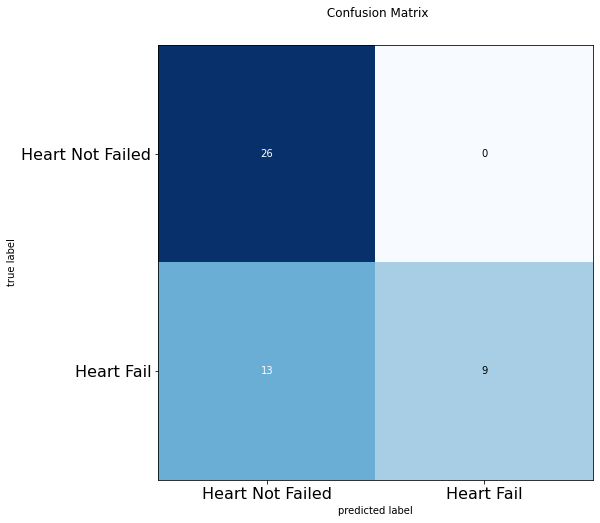

loop:  2
Accuracy : 89.58%
Recall : 76.92%
Precision:  83.33%
F1 score : 80.00%


<Figure size 432x288 with 0 Axes>

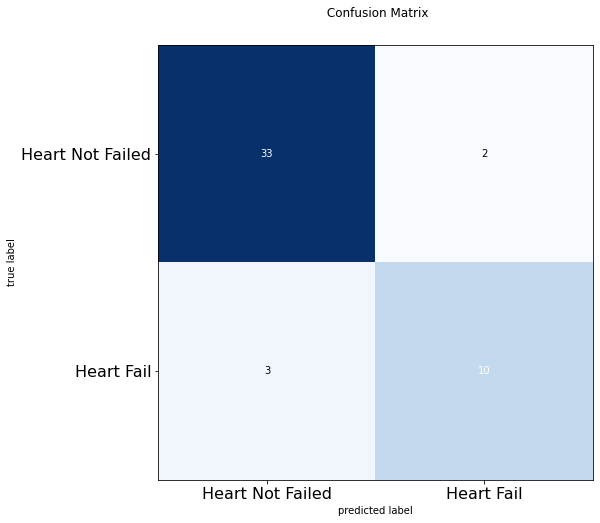

loop:  3
Accuracy : 76.60%
Recall : 50.00%
Precision:  81.82%
F1 score : 62.07%


<Figure size 432x288 with 0 Axes>

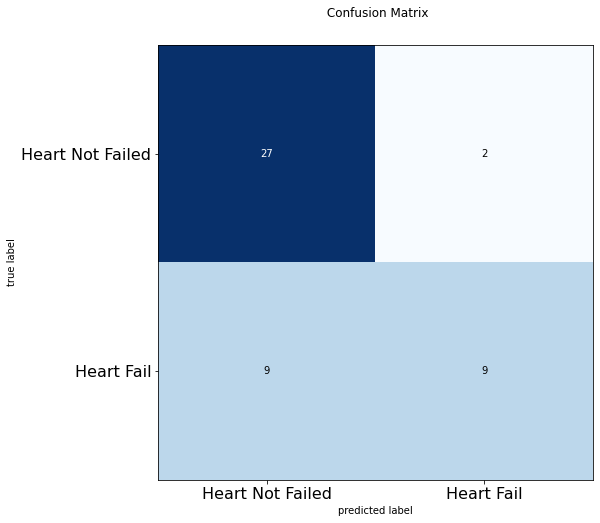

loop:  4


In [ ]:
cv = KFold(n_splits=5, shuffle=False)
c = 0
for train_index, valid_index in cv.split(x_train_valid):# verilerin 10 katlı çapraz geçerlemeye göre bölünüp sınanması
        x_train, x_valid, y_train, y_valid = x_train_valid.iloc[train_index], x_train_valid.iloc[valid_index], y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]
        SVCModel.fit(x_train,y_train)
        get_results(SVCModel,x_valid, y_valid)
        print("loop: ",c)
        c = c + 1

Accuracy : 90.00%
Recall : 64.71%
Precision:  100.00%
F1 score : 78.57%


<Figure size 432x288 with 0 Axes>

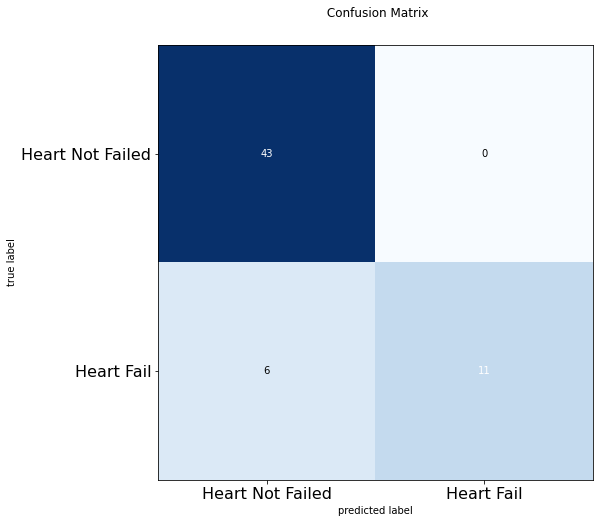

In [ ]:
# Using all test data
accuracy, recall, precision, f1  = get_results(SVCModel,x_test, y_test)

In [ ]:
all_accuracy.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_f1.append(f1)

**K Neighbors Classifier**

In [ ]:
KnnModel = KNeighborsClassifier(n_neighbors=5)


Accuracy : 87.50%
Recall : 83.33%
Precision:  71.43%
F1 score : 76.92%


<Figure size 432x288 with 0 Axes>

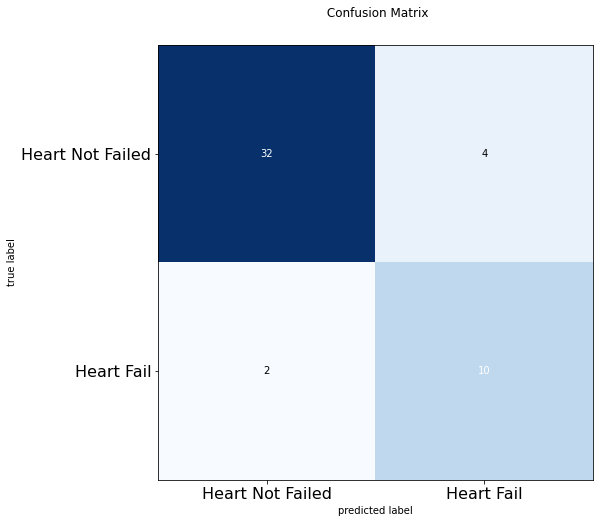

loop:  0
Accuracy : 87.50%
Recall : 78.57%
Precision:  78.57%
F1 score : 78.57%


<Figure size 432x288 with 0 Axes>

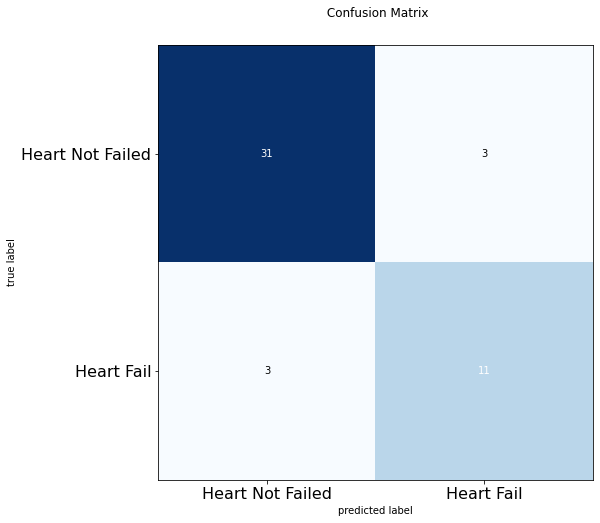

loop:  1
Accuracy : 72.92%
Recall : 40.91%
Precision:  100.00%
F1 score : 58.06%


<Figure size 432x288 with 0 Axes>

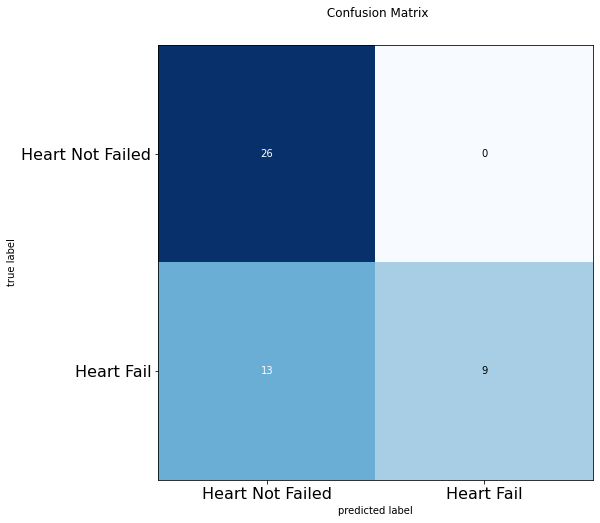

loop:  2
Accuracy : 87.50%
Recall : 69.23%
Precision:  81.82%
F1 score : 75.00%


<Figure size 432x288 with 0 Axes>

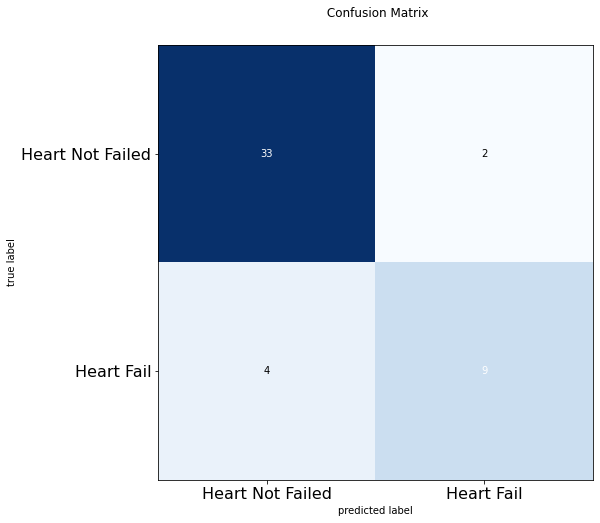

loop:  3
Accuracy : 78.72%
Recall : 55.56%
Precision:  83.33%
F1 score : 66.67%


<Figure size 432x288 with 0 Axes>

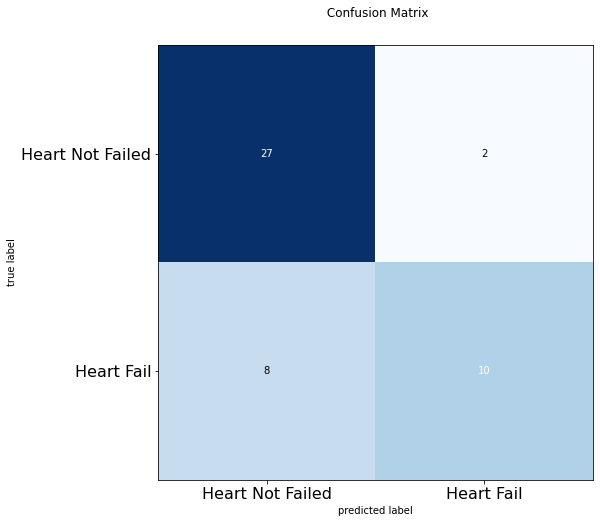

loop:  4


In [ ]:
cv = KFold(n_splits=5, shuffle=False)
c = 0
for train_index, valid_index in cv.split(x_train_valid):# verilerin 10 katlı çapraz geçerlemeye göre bölünüp sınanması
        x_train, x_valid, y_train, y_valid = x_train_valid.iloc[train_index], x_train_valid.iloc[valid_index], y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]
        KnnModel.fit(x_train,y_train)
        get_results(KnnModel,x_valid, y_valid)
        print("loop: ",c)
        c = c + 1

Accuracy : 91.67%
Recall : 70.59%
Precision:  100.00%
F1 score : 82.76%


<Figure size 432x288 with 0 Axes>

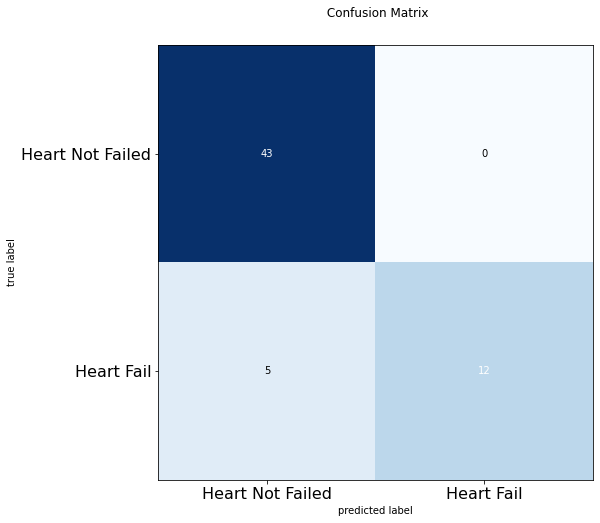

In [ ]:
# Using all test data
accuracy, recall, precision, f1  = get_results(KnnModel,x_test, y_test)

In [ ]:
all_accuracy.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_f1.append(f1)

**Decision Tree Classifier**

In [ ]:
DecisionTreeModel = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')


Accuracy : 87.50%
Recall : 83.33%
Precision:  71.43%
F1 score : 76.92%


<Figure size 432x288 with 0 Axes>

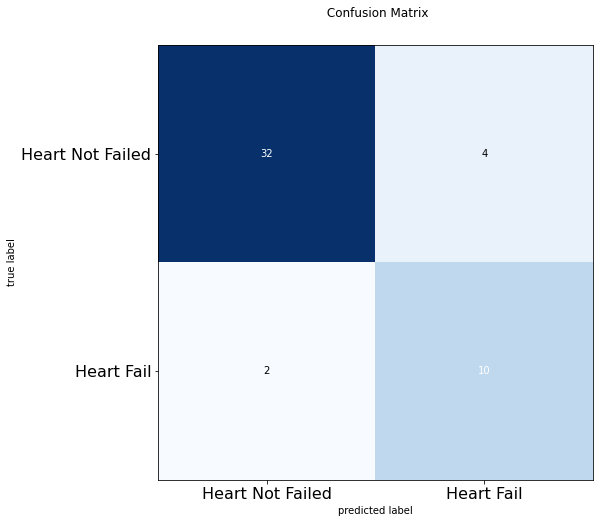

loop:  0
Accuracy : 89.58%
Recall : 71.43%
Precision:  90.91%
F1 score : 80.00%


<Figure size 432x288 with 0 Axes>

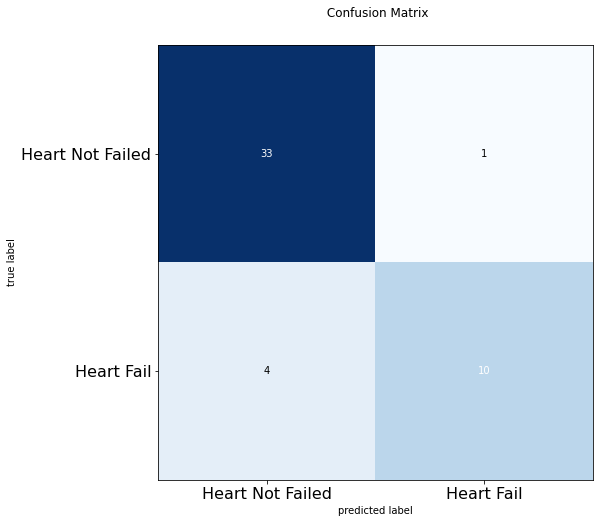

loop:  1
Accuracy : 72.92%
Recall : 45.45%
Precision:  90.91%
F1 score : 60.61%


<Figure size 432x288 with 0 Axes>

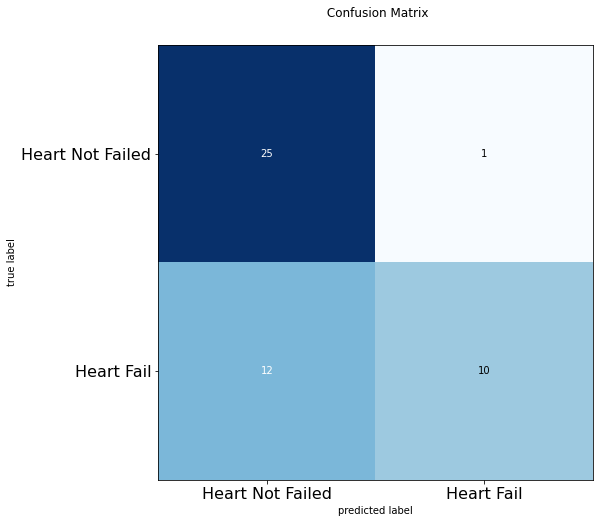

loop:  2
Accuracy : 87.50%
Recall : 76.92%
Precision:  76.92%
F1 score : 76.92%


<Figure size 432x288 with 0 Axes>

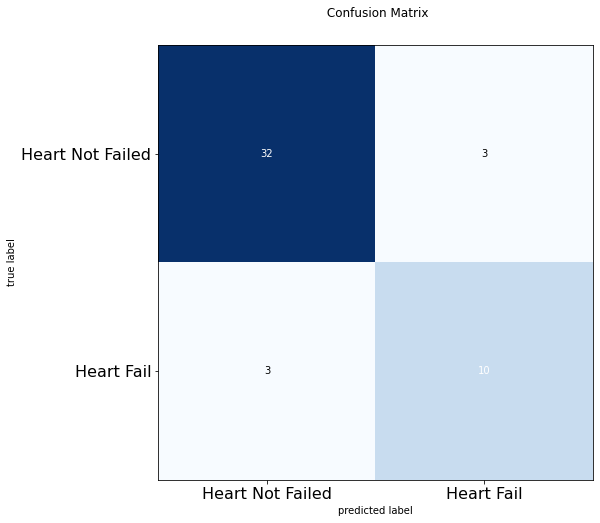

loop:  3
Accuracy : 76.60%
Recall : 50.00%
Precision:  81.82%
F1 score : 62.07%


<Figure size 432x288 with 0 Axes>

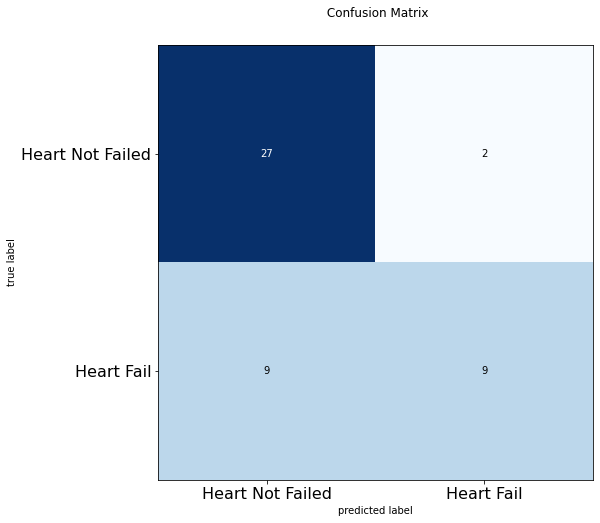

loop:  4


In [ ]:
cv = KFold(n_splits=5, shuffle=False)
c = 0
for train_index, valid_index in cv.split(x_train_valid):# verilerin 10 katlı çapraz geçerlemeye göre bölünüp sınanması
        x_train, x_valid, y_train, y_valid = x_train_valid.iloc[train_index], x_train_valid.iloc[valid_index], y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]
        DecisionTreeModel.fit(x_train,y_train)
        get_results(DecisionTreeModel,x_valid, y_valid)
        print("loop: ",c)
        c = c + 1

Accuracy : 90.00%
Recall : 64.71%
Precision:  100.00%
F1 score : 78.57%


<Figure size 432x288 with 0 Axes>

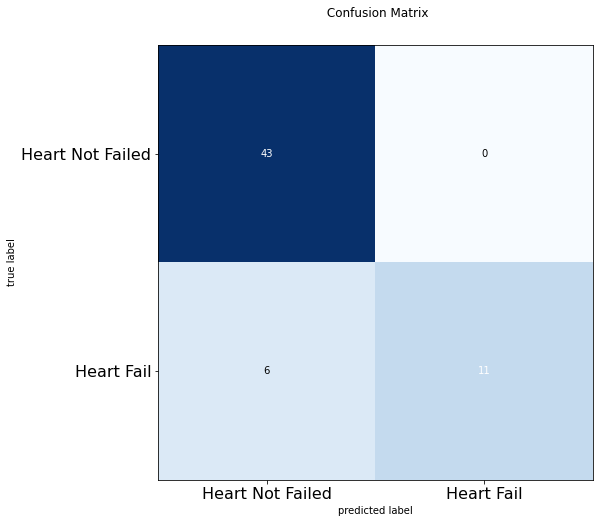

In [ ]:
# Using all test data
accuracy, recall, precision, f1  = get_results(DecisionTreeModel,x_test, y_test)

In [ ]:
all_accuracy.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_f1.append(f1)

**Random Forest Classifier**

In [ ]:
RandomForestModel = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)

Accuracy : 83.33%
Recall : 91.67%
Precision:  61.11%
F1 score : 73.33%


<Figure size 432x288 with 0 Axes>

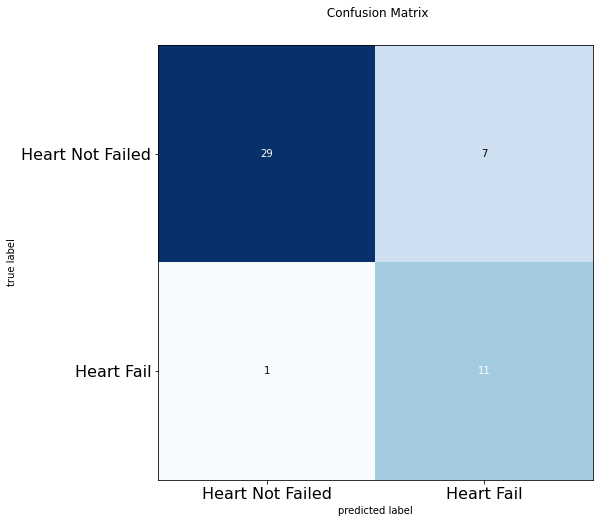

loop:  0
Accuracy : 91.67%
Recall : 78.57%
Precision:  91.67%
F1 score : 84.62%


<Figure size 432x288 with 0 Axes>

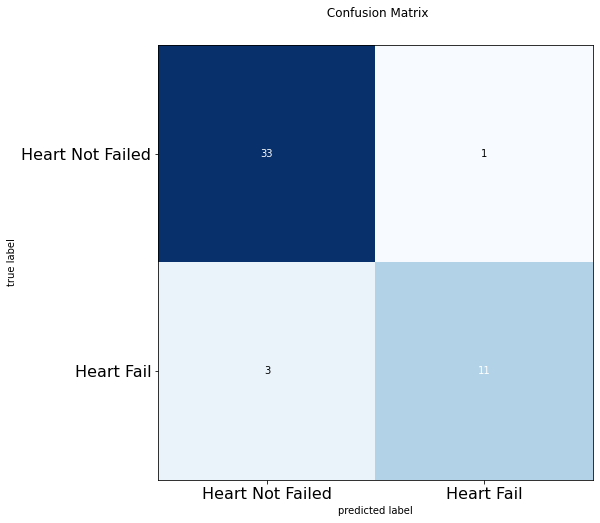

loop:  1
Accuracy : 81.25%
Recall : 59.09%
Precision:  100.00%
F1 score : 74.29%


<Figure size 432x288 with 0 Axes>

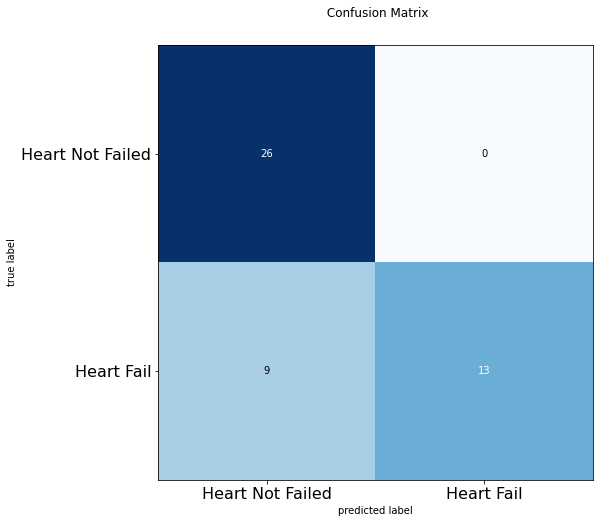

loop:  2
Accuracy : 77.08%
Recall : 69.23%
Precision:  56.25%
F1 score : 62.07%


<Figure size 432x288 with 0 Axes>

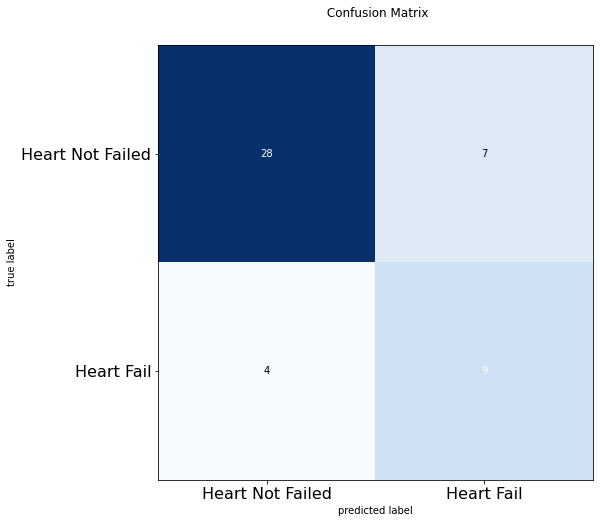

loop:  3
Accuracy : 78.72%
Recall : 55.56%
Precision:  83.33%
F1 score : 66.67%


<Figure size 432x288 with 0 Axes>

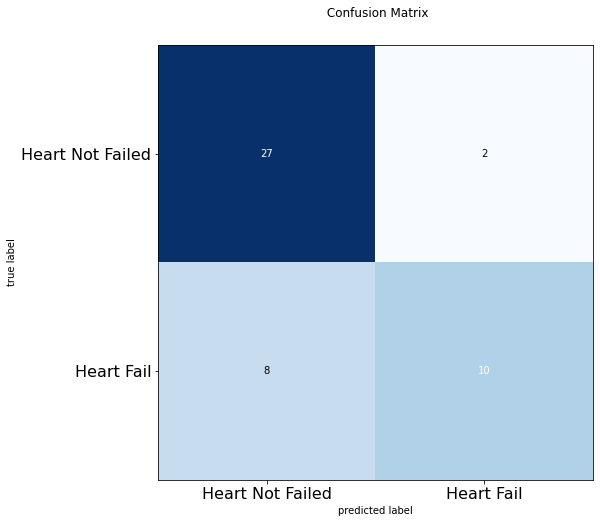

loop:  4


In [ ]:
cv = KFold(n_splits=5, shuffle=False)
c = 0
for train_index, valid_index in cv.split(x_train_valid):# verilerin 10 katlı çapraz geçerlemeye göre bölünüp sınanması
        x_train, x_valid, y_train, y_valid = x_train_valid.iloc[train_index], x_train_valid.iloc[valid_index], y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]
        RandomForestModel.fit(x_train,y_train)
        get_results(RandomForestModel,x_valid, y_valid)
        print("loop: ",c)
        c = c + 1

Accuracy : 95.00%
Recall : 88.24%
Precision:  93.75%
F1 score : 90.91%


<Figure size 432x288 with 0 Axes>

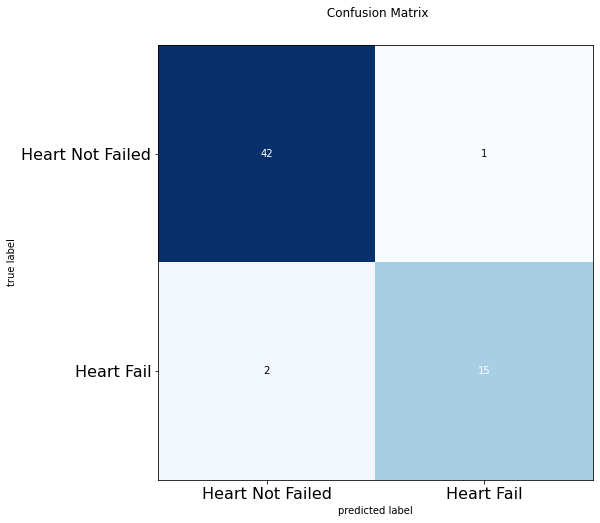

In [ ]:
# Using all test data
accuracy, recall, precision, f1  = get_results(RandomForestModel,x_test, y_test)

In [ ]:
all_accuracy.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_f1.append(f1)

**Gradient Boosting Classifier**

In [ ]:
GradientBoostingModel = GradientBoostingClassifier(max_depth=2, random_state=1)


Accuracy : 83.33%
Recall : 91.67%
Precision:  61.11%
F1 score : 73.33%


<Figure size 432x288 with 0 Axes>

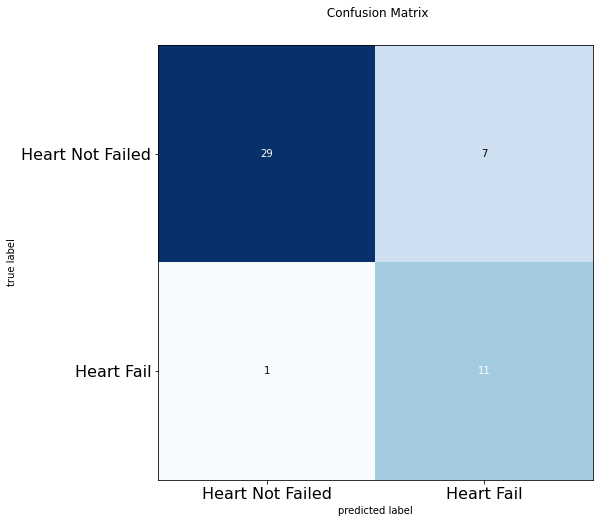

loop:  0
Accuracy : 89.58%
Recall : 71.43%
Precision:  90.91%
F1 score : 80.00%


<Figure size 432x288 with 0 Axes>

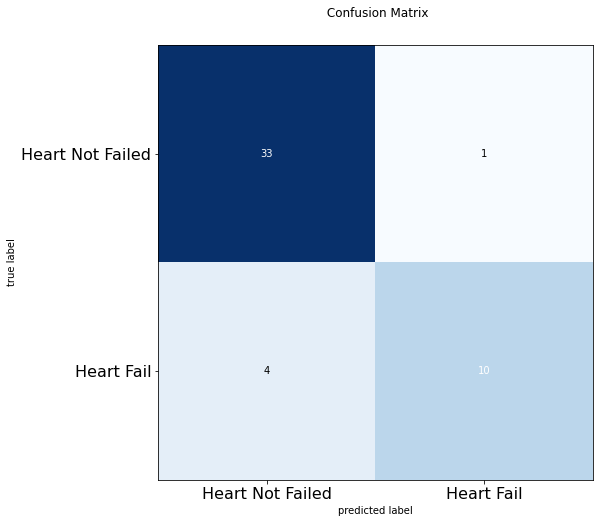

loop:  1
Accuracy : 72.92%
Recall : 50.00%
Precision:  84.62%
F1 score : 62.86%


<Figure size 432x288 with 0 Axes>

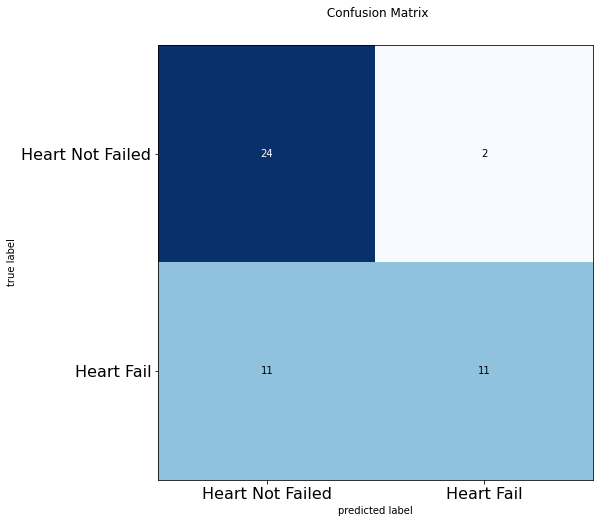

loop:  2
Accuracy : 79.17%
Recall : 69.23%
Precision:  60.00%
F1 score : 64.29%


<Figure size 432x288 with 0 Axes>

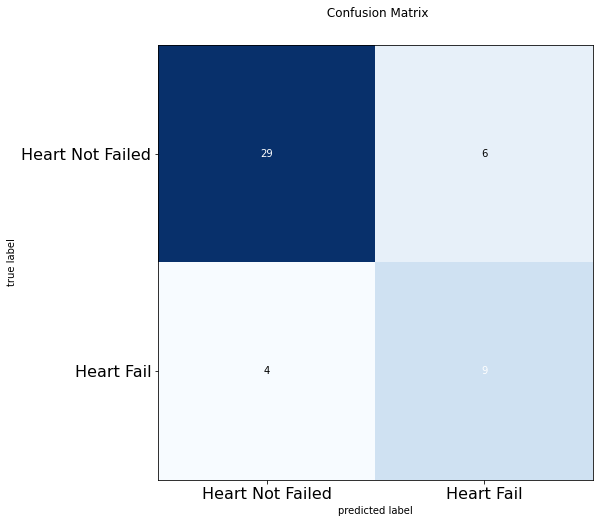

loop:  3
Accuracy : 78.72%
Recall : 55.56%
Precision:  83.33%
F1 score : 66.67%


<Figure size 432x288 with 0 Axes>

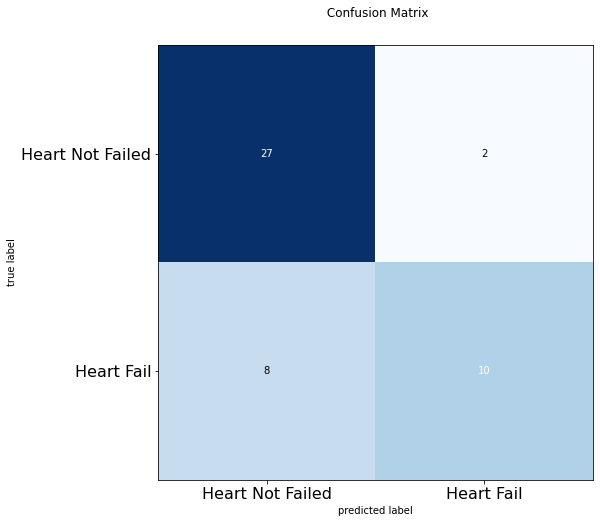

loop:  4


In [ ]:
cv = KFold(n_splits=5, shuffle=False)
c = 0
for train_index, valid_index in cv.split(x_train_valid):# verilerin 10 katlı çapraz geçerlemeye göre bölünüp sınanması
        x_train, x_valid, y_train, y_valid = x_train_valid.iloc[train_index], x_train_valid.iloc[valid_index], y_train_valid.iloc[train_index], y_train_valid.iloc[valid_index]
        GradientBoostingModel.fit(x_train,y_train)
        get_results(GradientBoostingModel,x_valid, y_valid)
        print("loop: ",c)
        c = c + 1

Accuracy : 93.33%
Recall : 82.35%
Precision:  93.33%
F1 score : 87.50%


<Figure size 432x288 with 0 Axes>

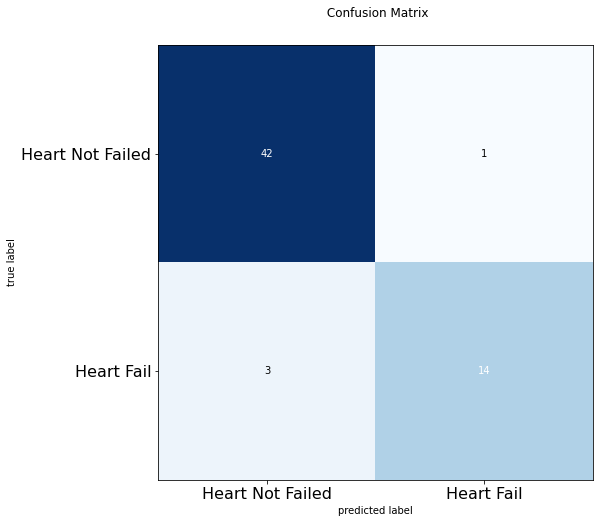

In [ ]:
# Using all test data
accuracy, recall, precision, f1  = get_results(GradientBoostingModel,x_test, y_test)

In [ ]:
all_accuracy.append(accuracy)
all_recall.append(recall)
all_precision.append(precision)
all_f1.append(f1)

In [ ]:
models

['Logistic Regression',
 'SVMC',
 'KNearestNeighbours',
 'DecisionTree',
 'RandomForest',
 'GradientBooster']

In [ ]:
all_accuracy

[0.9, 0.9, 0.9166666666666666, 0.9, 0.95, 0.9333333333333333]

# **Comapring All Models**

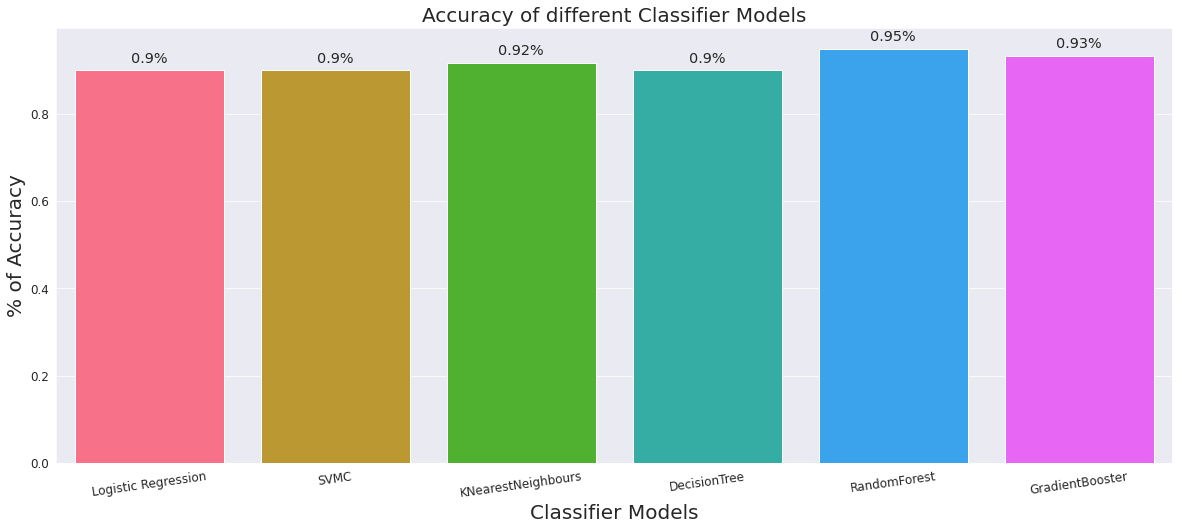

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=all_accuracy, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

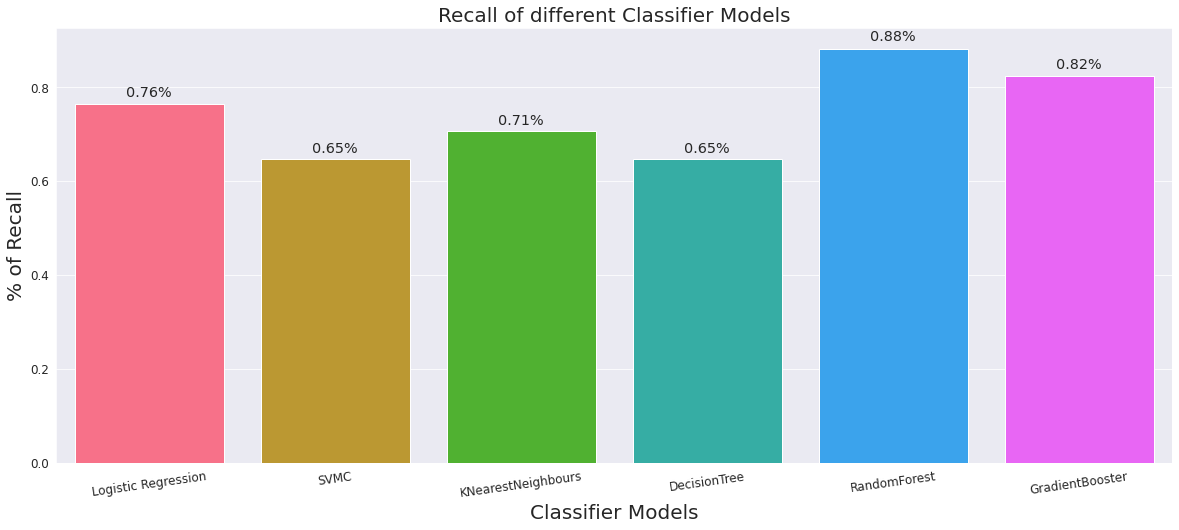

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=all_recall, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Recall', fontsize = 20)
plt.title('Recall of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

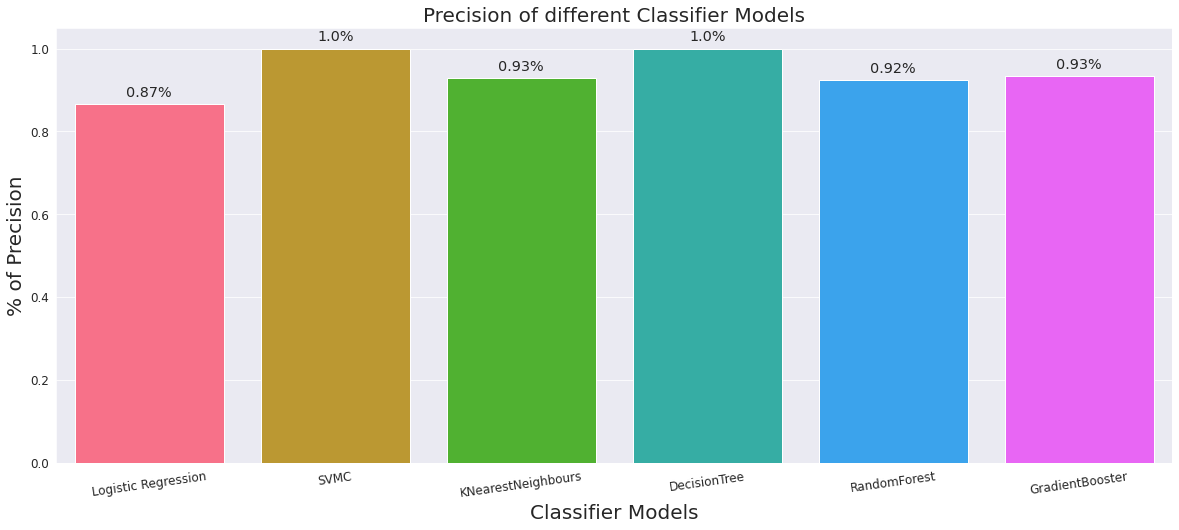

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=all_precision, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Precision', fontsize = 20)
plt.title('Precision of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

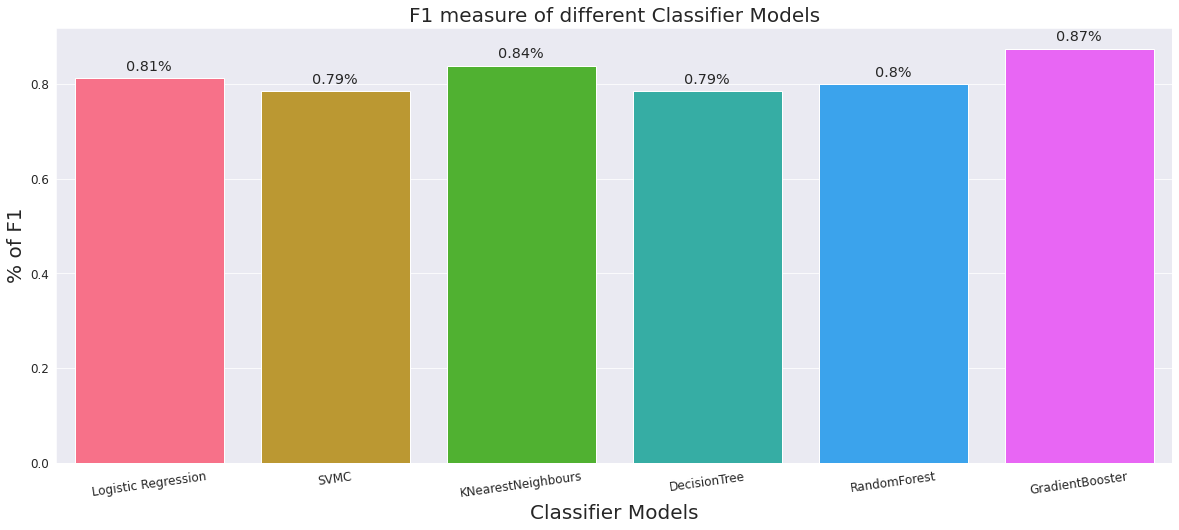

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=models, y=all_f1, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of F1', fontsize = 20)
plt.title('F1 measure of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()